## 1. 데이터 불러오기

In [2]:
import pandas as pd
df = pd.read_excel('./data.xlsx', engine='openpyxl')


In [3]:
df

,주차,요일,수요
0,1,월,6139
1,1,화,17191
2,1,수,15797
3,1,목,9898
4,1,금,12542
...,...,...,...
65,10,수,??
66,10,목,??
67,10,금,??
68,10,토,??


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   주차      70 non-null     int64 
 1   요일      70 non-null     object
 2   수요      70 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.8+ KB


- 임의의 날짜값으로 변환(x축변수 하나로 만들기 위해서) 지금은 주차와 요일을 둘 다 확인해야함 컴퓨터는 숫자만 알기때문에 변환

In [5]:
요일순서 = {'월': 0, '화': 1, '수': 2, '목': 3, '금': 4, '토': 5, '일': 6}
df['요일순서'] = df['요일'].map(요일순서)

In [6]:
import pandas as pd
from datetime import timedelta

# 임의의 기준일: 1주차 월요일을 2023-01-02로 계산편의성을 위해
start_date = pd.to_datetime("2023-01-02")

# 임의로 날짜 계산
df['날짜'] = df.apply(lambda row: start_date + timedelta(weeks=row['주차']-1, days=row['요일순서']), axis=1)


In [7]:
df

,주차,요일,수요,요일순서,날짜
0,1,월,6139,0,2023-01-02
1,1,화,17191,1,2023-01-03
2,1,수,15797,2,2023-01-04
3,1,목,9898,3,2023-01-05
4,1,금,12542,4,2023-01-06
...,...,...,...,...,...
65,10,수,??,2,2023-03-08
66,10,목,??,3,2023-03-09
67,10,금,??,4,2023-03-10
68,10,토,??,5,2023-03-11


In [8]:
#혹시모르니 날짜로 정렬
df = df.sort_values('날짜')

## **시각화(간단)**

- 수요량 날짜별 확인

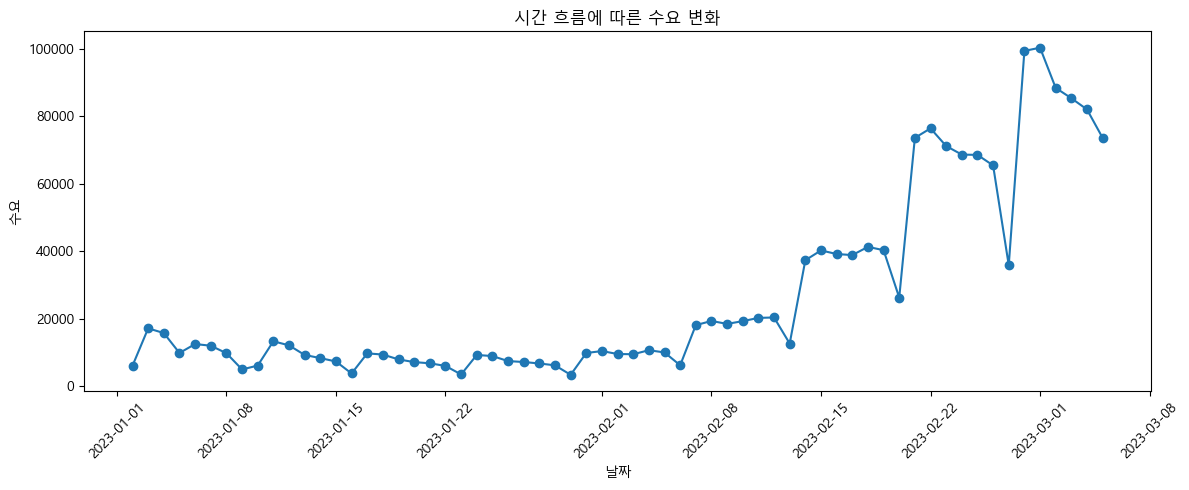

In [9]:
import pandas as pd
from datetime import timedelta
import matplotlib.pyplot as plt

# 한글 폰트 설정 (Windows)
plt.rcParams['font.family'] = 'Malgun Gothic'


# 2. 수요만 수치형으로 변환
df['수요'] = pd.to_numeric(df['수요'], errors='coerce')

# 3. 요일을 숫자로 매핑
요일순서 = {'월': 0, '화': 1, '수': 2, '목': 3, '금': 4, '토': 5, '일': 6}
df['요일순서'] = df['요일'].map(요일순서)

# 4. 날짜 계산 (기준일: 1주차 월요일 = 2023-01-02)
start_date = pd.to_datetime("2023-01-02")
df['날짜'] = df.apply(lambda row: start_date + timedelta(weeks=int(row['주차'])-1, days=row['요일순서']), axis=1)

# 5. 날짜 기준 정렬
df = df.sort_values('날짜')

# 6. 시각화
plt.figure(figsize=(12, 5))
plt.plot(df['날짜'], df['수요'], marker='o')
plt.xlabel('날짜')
plt.ylabel('수요')
plt.title('시간 흐름에 따른 수요 변화')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


- 추세와 계절성이 확실히 보임!
- 시간이 갈수록 계절성은 유지되지만 주차별 평균 수요량이 커짐 -> 회고적 성격의 방식을 쓰면 안되겠군 이중평활?


C:\Users\wngud\AppData\Local\Temp\ipykernel_11052\3895395578.py:30: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout(rect=[0, 0, 1, 0.97])  # 제목과 그래프 간격 확보
C:\Users\wngud\AppData\Local\Temp\ipykernel_11052\3895395578.py:30: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout(rect=[0, 0, 1, 0.97])  # 제목과 그래프 간격 확보
c:\Users\wngud\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\wngud\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\wngud\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


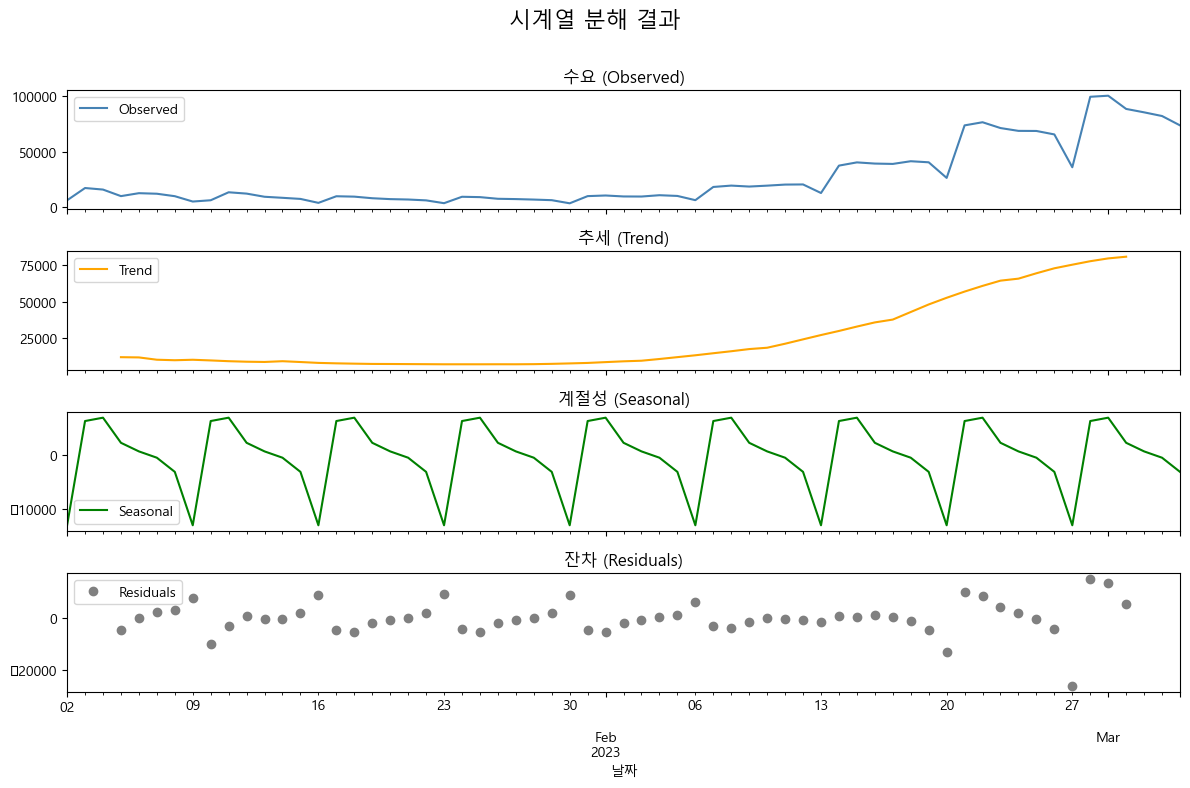

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# 분해 
decomp = seasonal_decompose(df['수요'], model='additive', period=7)

# 시각화
fig, axes = plt.subplots(4, 1, figsize=(12, 8), sharex=True)

# 구성요소 그리기
decomp.observed.plot(ax=axes[0], label='Observed', color='steelblue')
axes[0].set_title('수요 (Observed)')
axes[0].legend()

decomp.trend.plot(ax=axes[1], label='Trend', color='orange')
axes[1].set_title('추세 (Trend)')
axes[1].legend()

decomp.seasonal.plot(ax=axes[2], label='Seasonal', color='green')
axes[2].set_title('계절성 (Seasonal)')
axes[2].legend()

decomp.resid.plot(ax=axes[3], style='o', label='Residuals', color='gray')
axes[3].set_title('잔차 (Residuals)')
axes[3].legend()

# 전체 레이아웃 정리
plt.suptitle('시계열 분해 결과', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])  # 제목과 그래프 간격 확보
plt.show()


- 계절성확인
- 비계절화
- 추세기준으로 예측
- 계절성 부여

C:\Users\wngud\AppData\Local\Temp\ipykernel_11052\2831578111.py:29: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout(rect=[0, 0, 1, 0.97])
C:\Users\wngud\AppData\Local\Temp\ipykernel_11052\2831578111.py:29: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout(rect=[0, 0, 1, 0.97])
c:\Users\wngud\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\wngud\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\wngud\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


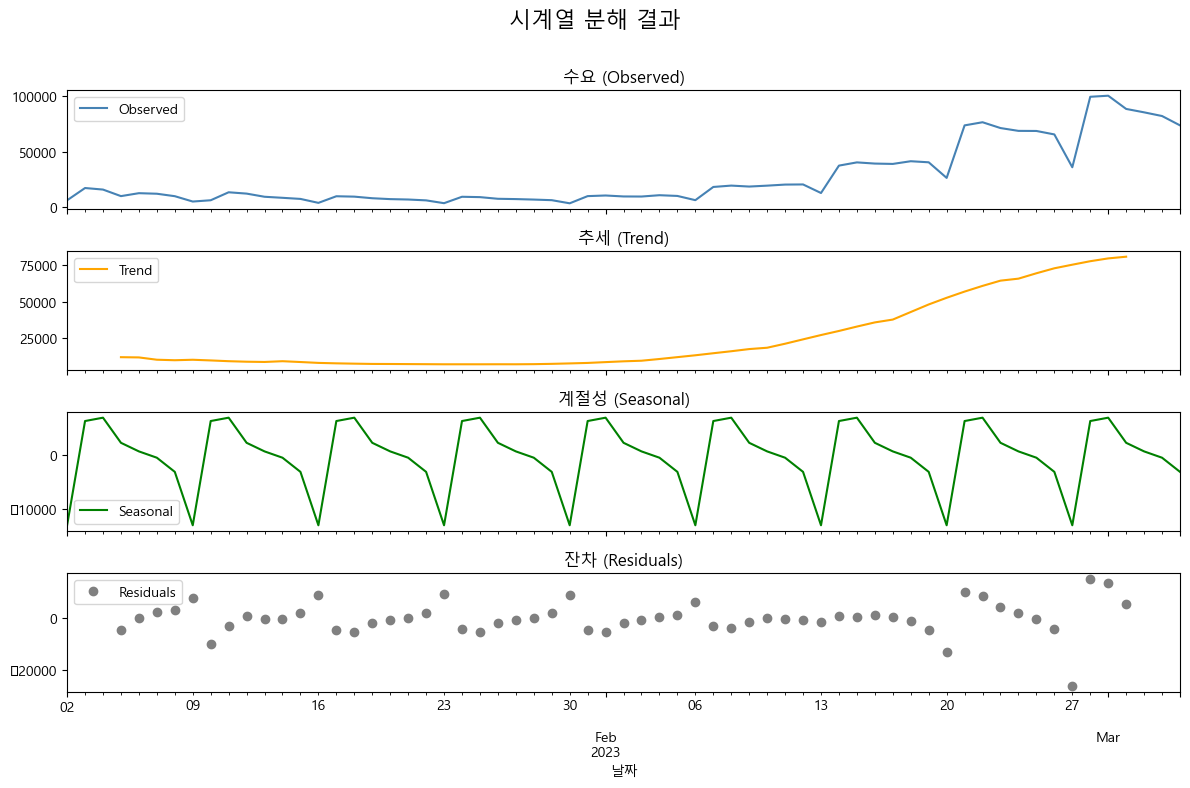

c:\Users\wngud\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\wngud\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


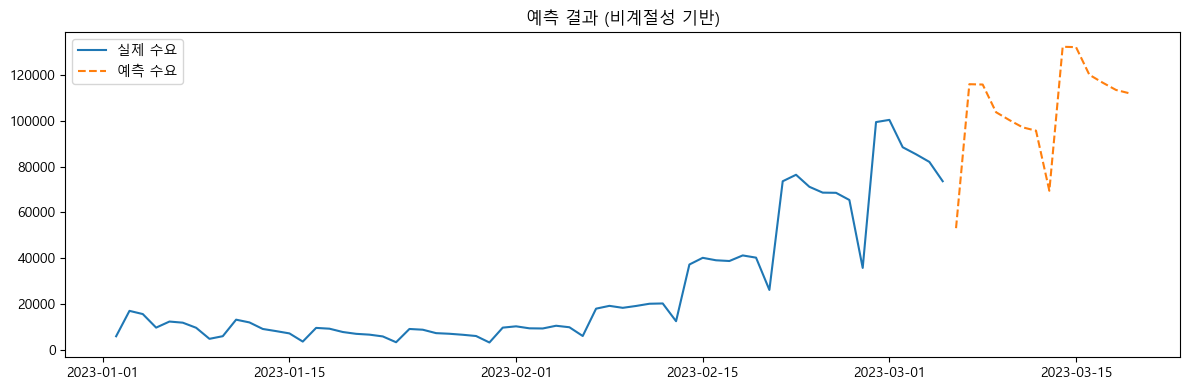

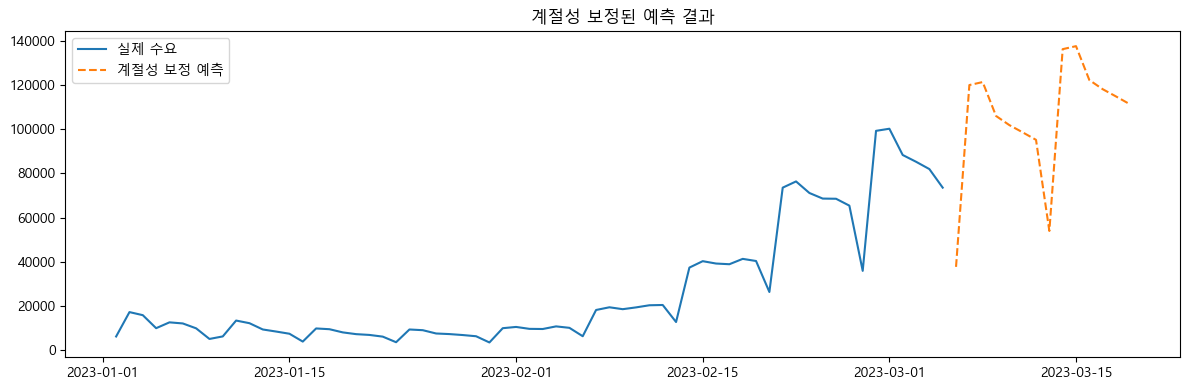

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
# 2. 비계절화 (seasonal_decompose)
decomp = seasonal_decompose(df['수요'], model='additive', period=7)

# 3. 추세 확인 + 분해 결과 보기 좋게 시각화
fig, axes = plt.subplots(4, 1, figsize=(12, 8), sharex=True)

decomp.observed.plot(ax=axes[0], label='Observed', color='steelblue')
axes[0].set_title('수요 (Observed)')
axes[0].legend()

decomp.trend.plot(ax=axes[1], label='Trend', color='orange')
axes[1].set_title('추세 (Trend)')
axes[1].legend()

decomp.seasonal.plot(ax=axes[2], label='Seasonal', color='green')
axes[2].set_title('계절성 (Seasonal)')
axes[2].legend()

decomp.resid.plot(ax=axes[3], style='o', label='Residuals', color='gray')
axes[3].set_title('잔차 (Residuals)')
axes[3].legend()

plt.suptitle('시계열 분해 결과', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

# ────────────────────────────────
# 4. 수요량 예측 (Holt-Winters)
model = ExponentialSmoothing(df['수요'], trend='add', seasonal='add', seasonal_periods=7)
fit = model.fit()

# 향후 14일 예측
forecast = fit.forecast(14)

plt.figure(figsize=(12, 4))
plt.plot(df['수요'], label='실제 수요')
plt.plot(forecast, label='예측 수요', linestyle='--')
plt.title('예측 결과 (비계절성 기반)')
plt.legend()
plt.tight_layout()
plt.show()

# ────────────────────────────────
# 5. 계절성 부여 (요일별 평균 기준 보정)
df['요일'] = df.index.day_name()
weekday_avg = df.groupby('요일')['수요'].mean()

adjusted_forecast = forecast.copy()
for i in range(len(adjusted_forecast)):
    pred_date = df.index[-1] + timedelta(days=i+1)
    weekday = pred_date.day_name()
    seasonal_offset = weekday_avg[weekday] - weekday_avg.mean()
    adjusted_forecast.iloc[i] += seasonal_offset

# 계절성 보정된 예측 시각화
plt.figure(figsize=(12, 4))
plt.plot(df['수요'], label='실제 수요')
plt.plot(adjusted_forecast, label='계절성 보정 예측', linestyle='--')
plt.title('계절성 보정된 예측 결과')
plt.legend()
plt.tight_layout()
plt.show()

In [17]:
df

,주차,요일,수요,요일순서
날짜,,,,
2023-01-02,1,Monday,6139.0,0
2023-01-03,1,Tuesday,17191.0,1
2023-01-04,1,Wednesday,15797.0,2
2023-01-05,1,Thursday,9898.0,3
2023-01-06,1,Friday,12542.0,4
...,...,...,...,...
2023-03-01,9,Wednesday,100285.0,2
2023-03-02,9,Thursday,88384.0,3
2023-03-03,9,Friday,85320.0,4


# 예측값

In [16]:
print(adjusted_forecast[:7])


2023-03-06     37690.651064
2023-03-07    120072.681608
2023-03-08    121434.712013
2023-03-09    106072.740644
2023-03-10    101929.710373
2023-03-11     98644.487000
2023-03-12     95248.326585
Freq: D, dtype: float64
